# Mini Project

# Google Play Store Apps - Popularity Based Recommender System
## Web scraped data of 10k Play Store apps for analysing the Android market.

We use Popularity Based Recommender Systems to recommend the most populer apps in accordance to their ratings.

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv

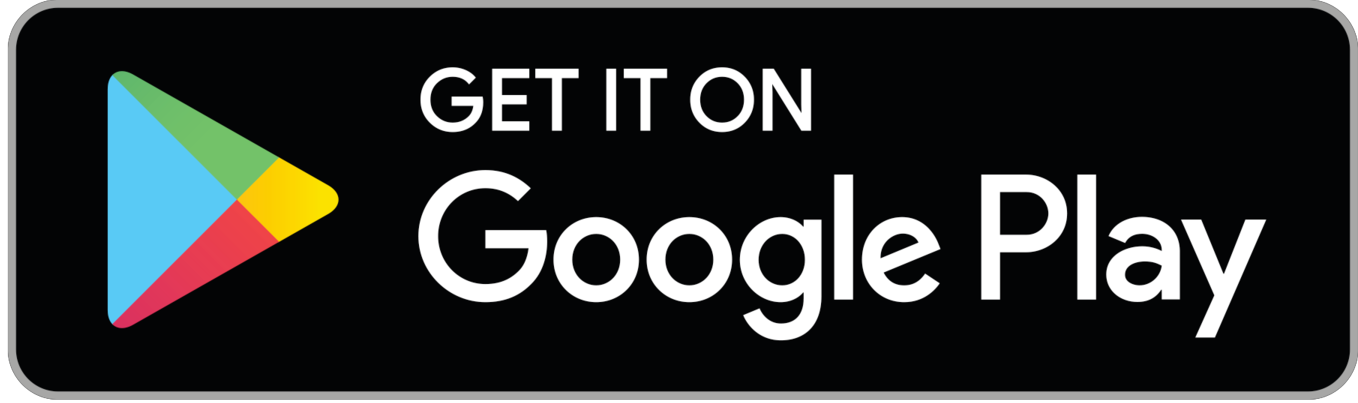

# Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [2]:
# load data
ratings = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv', usecols=['App', 'Rating', 'Genres','Reviews'])

# EDA - Exploratory Data Analysis

In [3]:
ratings.head() # first 5 entries

,App,Rating,Reviews,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,Art & Design
1,Coloring book moana,3.9,967,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,Art & Design
3,Sketch - Draw & Paint,4.5,215644,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,967,Art & Design;Creativity


In [12]:
ratings.info() # infos about samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   App      10840 non-null  object
 1   Rating   10840 non-null  int64 
 2   Reviews  10840 non-null  object
 3   Genres   10840 non-null  object
dtypes: int64(1), object(3)
memory usage: 681.5+ KB


In [5]:
ratings.isnull().sum() # checking missing values

App           0
Rating     1474
Reviews       0
Genres        0
dtype: int64

In [6]:
ratings.Rating.fillna(ratings.Rating.mean(), inplace=True) # fill empty ratings with their mean value
ratings['Rating'] = ratings['Rating'].round().astype(int) # round the ratings and turn to integer
ratings = ratings[ratings['Rating'] <= 5] # to not take the 19. in the ratings.

In [14]:
print("Number of Apps:", ratings.App.nunique()) # number of Apps

Number of Apps: 9659


We have now 10840 samples, 9659 Apps, 4 features and no empty values.

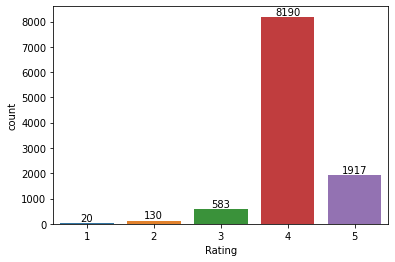

In [22]:
# plot the ratings
ax=sns.countplot(x=ratings.Rating) 
ax.bar_label(ax.containers[0]);

Most of the Ratings are positive with a Rating of 4.

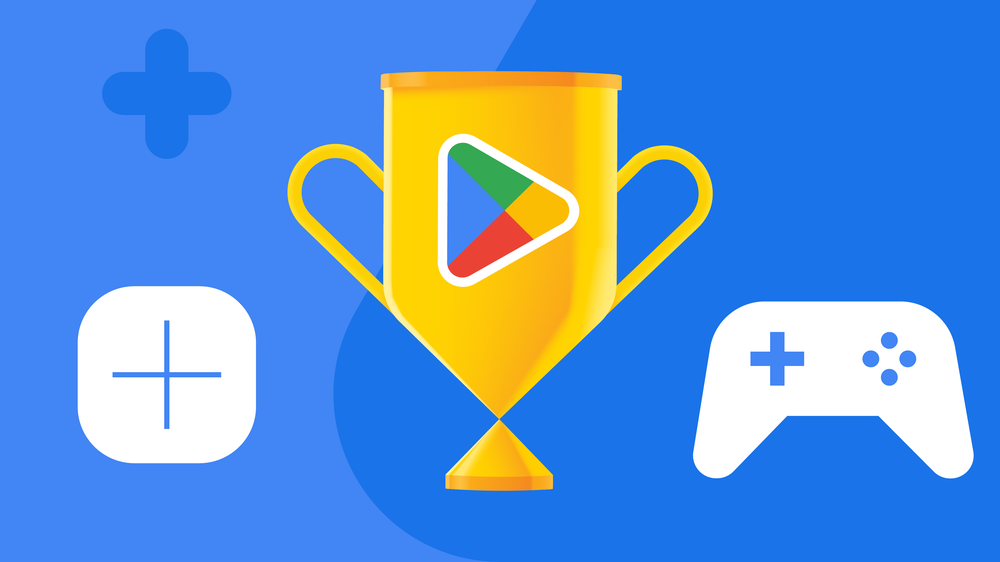

# Popularity Based Recommender System
Recommending the most populer Apps:
First we seperate our Apps to groups and see how many users gave the book a rating. We also calculate the total number and mean value of the ratings. Then we calculate the percentage weight and show all these in a Dataframe, showing the most popular App on top.

In [9]:
# function to calculate popularity stats
def popularity_based_rec(df, group_col, rating_col):
    # group by title and get size, sum and mean values
    grouped = df.groupby(group_col).agg({rating_col: [np.size, np.sum, np.mean]})
    # most popular mean value on top
    popular = grouped.sort_values((rating_col, "mean"), ascending=False)
    total_sum = grouped[rating_col]["sum"].sum() # needed for sum by percentage
    # percentage weight
    popular["percentage"] = popular[rating_col]["sum"].div(total_sum) * 100
    return popular.sort_values(("percentage"), ascending=False)

**Show top 5 Apps**

In [24]:
# call function and show top 5 Apps
popularity_stats = popularity_based_rec(ratings, "App", "Rating")
popularity_stats.head()# show top 5 Apps

Rating          percentage
                                                    size sum mean           
App                                                                         
ROBLOX                                                 9  36  4.0   0.081129
Duolingo: Learn Languages Free                         7  35  5.0   0.078875
CBS Sports App - Scores, News, Stats & Watch Live      8  32  4.0   0.072114
Bowmasters                                             6  30  5.0   0.067607
Zombie Catchers                                        6  30  5.0   0.067607

If we have no information about the users, we should recommend **'ROBLOX'**, or Duolingo, CBS Sports, Bowmasters or Zombie Cathers.

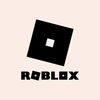 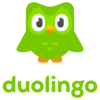 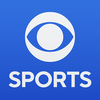 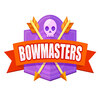 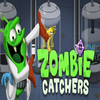